In [1]:
import pandas as pd
import numpy as np


from itertools import product
from tqdm import tqdm
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.metrics import mean_squared_error

from functions.tsplot import tsplot
from functions.unboxcox import unboxcox
from functions.unyeo_johnson import unyeo_johnson
from functions.make_stationary import make_stationary
from functions.un_stationary import un_stationary


import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.simplefilter('ignore')


%config InlineBackend.figure_formats = 'svg'
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/preprocessed_data/train_last_50_days_ago.csv')
df['MEASURED_IN_DATE'] = pd.to_datetime(df['MEASURED_IN_DATE'])
df.set_index('MEASURED_IN_DATE', inplace=True)


test_size = 60

data = df[df['WELL_NAME'] == 1][['TARGET_OIL_RATE']]

data_test = df[df['WELL_NAME'] == 1][['TARGET_OIL_RATE']][- test_size :]
data_train = df[df['WELL_NAME'] == 1][['TARGET_OIL_RATE']][: - test_size]


data_train_station, lmbda_yj, n_elem, n_elements = make_stationary(data_train['TARGET_OIL_RATE'], n_season=7)

data_train['TARGET_OIL_RATE_STATIONARY'] = data_train_station
data_train

,TARGET_OIL_RATE,TARGET_OIL_RATE_STATIONARY
MEASURED_IN_DATE,,
2020-10-20,59.21,NaN
2020-10-21,59.21,NaN
2020-10-22,59.21,NaN
2020-10-23,59.21,NaN
2020-10-24,59.21,NaN
...,...,...
2021-08-14,30.40,-0.000008
2021-08-15,30.40,0.000350
2021-08-16,30.40,0.000000


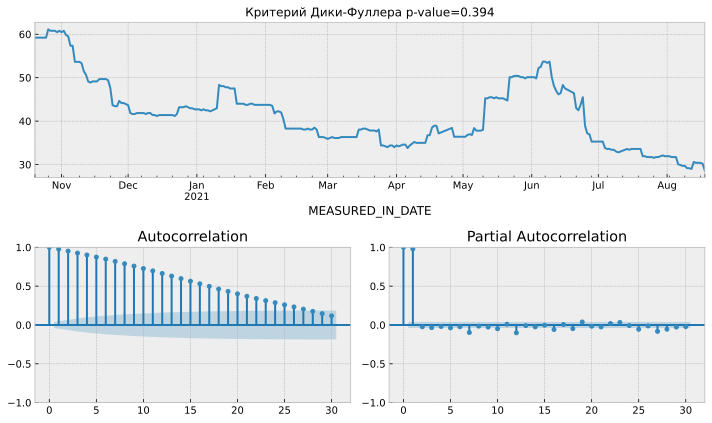

In [3]:
tsplot(data_train['TARGET_OIL_RATE'].dropna(), lags=30)

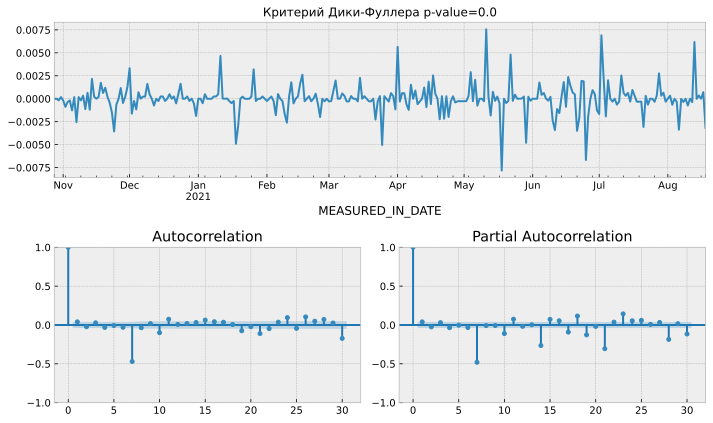

In [4]:
tsplot(data_train['TARGET_OIL_RATE_STATIONARY'].dropna(), lags=30)

In [28]:
ps = list(np.random.randint(0, 50, 3))
d = 1
qs = list(np.random.randint(0, 10, 3))
Ps = list(np.random.randint(0, 10, 3))
D = 1
Qs = list(np.random.randint(0, 10, 3))
s = 7

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

In [29]:
results = []
best_aic = np.inf

for param in tqdm(parameters_list, colour='green'):
    
    try:
        model = sm.tsa.statespace.SARIMAX(endog=data_train['TARGET_OIL_RATE_STATIONARY'], 
                                          order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], s),).fit(disp=-1, njobs=-1)
    except ValueError:
        print(f'wrong parameters {param}')
        continue
    aic = model.aic
    
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, aic])
    
result_table = pd.DataFrame(results, columns=['PARAMETERS', 'AIC'])
result_table.sort_values(by='AIC').head()

  0%|                                                                                           | 0/81 [00:00<?, ?it/s]

wrong parameters (23, 5, 1, 2)
wrong parameters (23, 5, 1, 1)
wrong parameters (23, 5, 1, 4)
wrong parameters (23, 5, 2, 2)
wrong parameters (23, 5, 2, 1)
wrong parameters (23, 5, 2, 4)
wrong parameters (23, 5, 2, 2)
wrong parameters (23, 5, 2, 1)
wrong parameters (23, 5, 2, 4)
wrong parameters (23, 7, 1, 2)
wrong parameters (23, 7, 1, 1)
wrong parameters (23, 7, 1, 4)
wrong parameters (23, 7, 2, 2)
wrong parameters (23, 7, 2, 1)
wrong parameters (23, 7, 2, 4)
wrong parameters (23, 7, 2, 2)
wrong parameters (23, 7, 2, 1)
wrong parameters (23, 7, 2, 4)
wrong parameters (23, 0, 1, 2)
wrong parameters (23, 0, 1, 1)
wrong parameters (23, 0, 1, 4)
wrong parameters (23, 0, 2, 2)
wrong parameters (23, 0, 2, 1)
wrong parameters (23, 0, 2, 4)
wrong parameters (23, 0, 2, 2)
wrong parameters (23, 0, 2, 1)
wrong parameters (23, 0, 2, 4)


 44%|████████████████████████████████████▍                                             | 36/81 [00:54<03:49,  5.10s/it]

wrong parameters (4, 7, 1, 2)
wrong parameters (4, 7, 1, 1)
wrong parameters (4, 7, 1, 4)
wrong parameters (4, 7, 2, 2)
wrong parameters (4, 7, 2, 1)
wrong parameters (4, 7, 2, 4)
wrong parameters (4, 7, 2, 2)
wrong parameters (4, 7, 2, 1)
wrong parameters (4, 7, 2, 4)


100%|██████████████████████████████████████████████████████████████████████████████████| 81/81 [01:25<00:00,  1.06s/it]

wrong parameters (17, 5, 1, 2)
wrong parameters (17, 5, 1, 1)
wrong parameters (17, 5, 1, 4)
wrong parameters (17, 5, 2, 2)
wrong parameters (17, 5, 2, 1)
wrong parameters (17, 5, 2, 4)
wrong parameters (17, 5, 2, 2)
wrong parameters (17, 5, 2, 1)
wrong parameters (17, 5, 2, 4)
wrong parameters (17, 7, 1, 2)
wrong parameters (17, 7, 1, 1)
wrong parameters (17, 7, 1, 4)
wrong parameters (17, 7, 2, 2)
wrong parameters (17, 7, 2, 1)
wrong parameters (17, 7, 2, 4)
wrong parameters (17, 7, 2, 2)
wrong parameters (17, 7, 2, 1)
wrong parameters (17, 7, 2, 4)
wrong parameters (17, 0, 1, 2)
wrong parameters (17, 0, 1, 1)
wrong parameters (17, 0, 1, 4)
wrong parameters (17, 0, 2, 2)
wrong parameters (17, 0, 2, 1)
wrong parameters (17, 0, 2, 4)
wrong parameters (17, 0, 2, 2)
wrong parameters (17, 0, 2, 1)
wrong parameters (17, 0, 2, 4)


,PARAMETERS,AIC
8,"(4, 5, 2, 4)",-2768.419764
5,"(4, 5, 2, 4)",-2768.419764
14,"(4, 0, 2, 4)",-2748.258984
17,"(4, 0, 2, 4)",-2748.258984
1,"(4, 5, 1, 1)",-2685.836526


In [17]:
best_model = sm.tsa.statespace.SARIMAX(endog=data_train['TARGET_OIL_RATE_STATIONARY'], 
                                          order=(best_param[0], d, best_param[1]), 
                                          seasonal_order=(best_param[2], D, best_param[3], s)).fit()
print(best_model.summary())
print(best_param)

                                        SARIMAX Results                                        
Dep. Variable:              TARGET_OIL_RATE_STATIONARY   No. Observations:                  303
Model:             SARIMAX(52, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood                1433.718
Date:                                 Mon, 01 May 2023   AIC                          -2755.437
Time:                                         19:20:01   BIC                          -2548.966
Sample:                                     10-20-2020   HQIC                         -2672.761
                                          - 08-18-2021                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0726      0.074     -0.981      0.326      -0.218       0

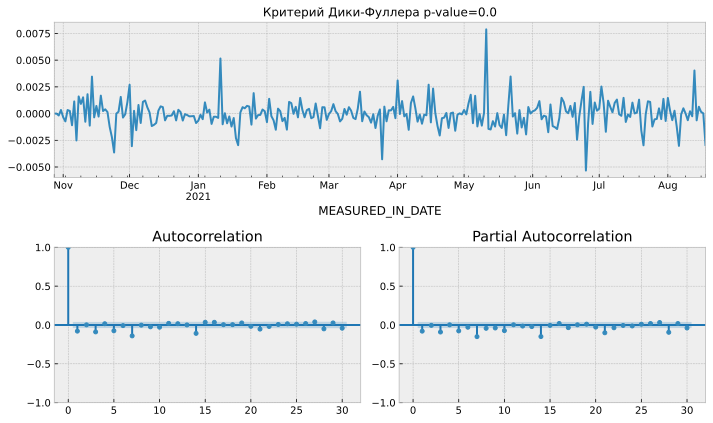

In [18]:
tsplot(best_model.resid[7:].dropna(), lags=30)

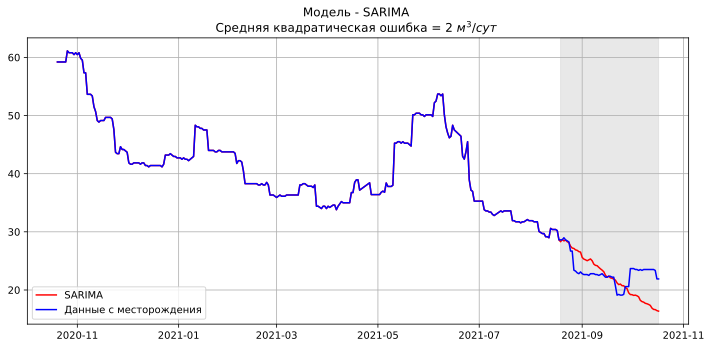

In [19]:
data_train['SARIMA_MODEL'] = best_model.fittedvalues
data_test['SARIMA_MODEL_FORECAST'] = best_model.predict(star=data_train.shape[0], end=data_train.shape[0] + test_size)

forecast = pd.concat([data_train['TARGET_OIL_RATE_STATIONARY'], data_test['SARIMA_MODEL_FORECAST']])
forecast_station = un_stationary(forecast, lmbda_yj, n_elem, n_elements)
data['SARIMA_MODEL_FORECAST'] = forecast_station



plt.figure(figsize=(10, 5));
plt.plot(data['SARIMA_MODEL_FORECAST'], color='r', label="SARIMA")
plt.title(f"Модель - SARIMA \n" 
          f"Средняя квадратическая ошибка "
          f"= {round(mean_squared_error(data['TARGET_OIL_RATE'], data['SARIMA_MODEL_FORECAST']))} $м^{3}/сут$ ")
plt.plot(data['TARGET_OIL_RATE'], color='blue', label="Данные с месторождения")
plt.legend()
plt.axvspan(xmin=data.index[-1] , 
            xmax=data.index[- test_size], 
            alpha=0.5, 
            color='lightgrey')
plt.grid(True)
plt.tight_layout()